In [13]:
import numpy as np
from collections import namedtuple
from matplotlib import pyplot as plt

In [1]:
input_data = 'target area: x=111..161, y=-154..-101'

In [97]:
Target = namedtuple('Target', ['xmin', 'xmax', 'ymin', 'ymax'])
target = Target(111, 161, -154, -101)
target

Target(xmin=111, xmax=161, ymin=-154, ymax=-101)

In [98]:
# x=20..30, y=-10..-5
#target = Target(20, 30, -10, -5)

# Part 1

In [99]:
def step(x, y, vx, vy):
    x += vx
    y += vy
    if vx > 0:
        # Don't have to worry about going to the left
        vx -= 1
    vy -= 1
    return x, y, vx, vy

In [100]:
def run_shot(vx, vy):
    x, y = 0,0
    path = []
    while x < target.xmax and y > target.ymin:
        x, y, vx, vy = step(x, y, vx, vy)
        #print(x, y, vx, vy)
        path.append((x, y))
        
    return path

In [101]:
def in_target(path):
    for x, y in path[::-1]:
        if (x <= target.xmax and x >= target.xmin and
            y <= target.ymax and y >= target.ymin):
            return True
    return False

True
210


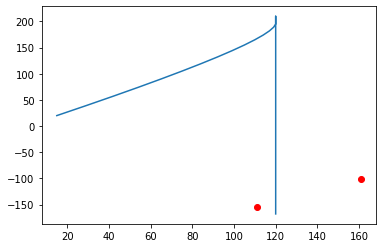

In [102]:
path = run_shot(15, 20)
#print(path)
print(in_target(path))
print(max([p[1] for p in path]))

plt.plot(*list(zip(*path)))
plt.scatter((target.xmin, target.xmax), (target.ymin, target.ymax), c='r')

In [110]:
vx = 16
y_max = -10000
for vy in range(0, 200):
    path = run_shot(vx, vy)
    max_y = max([p[1] for p in path])
    if in_target(path) and max_y > y_max:
        y_max = max_y
        vy_max = vy

print(vy_max)
print(y_max)

153
11781


(0.0, 168.25)

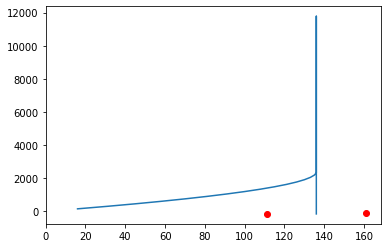

In [111]:
path = run_shot(vx, vy_max)
plt.plot(*list(zip(*path)))
plt.scatter((target.xmin, target.xmax), (target.ymin, target.ymax), c='r')
plt.xlim(0)

# Part 2

False
4095


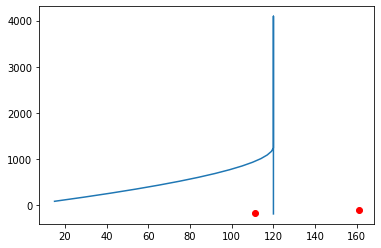

In [155]:
path = run_shot(15, 90)
#print(path)
print(in_target(path))
print(max([p[1] for p in path]))

plt.plot(*list(zip(*path)))
plt.scatter((target.xmin, target.xmax), (target.ymin, target.ymax), c='r')

In [215]:
vxmin, vxmax = 15, 800
vymin, vymax = -800, 250

In [216]:
checks = []
for vx in range(vxmin, vxmax):
    for vy in range(vymin, vymax):
        path = run_shot(vx, vy)
        checks.append((vx,vy, in_target(path)))

In [217]:
check_arr = np.zeros((vxmax-vxmin, vymax-vymin))
for vx,vy,c in checks:
    check_arr[vx-vxmin, vy-vymin] = int(c)

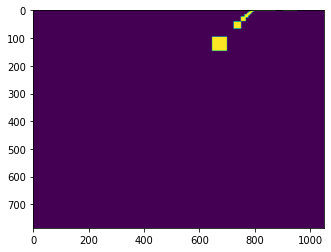

In [218]:
plt.imshow(check_arr)

In [220]:
sum([c[2] for c in checks])

4531